In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import json

## Spotify recommendation using MinHashing and Gaussian Mixture Models

## Group Members: Kaile Suoo, Jerry Li, Tawhid Ather

## Description


### Conflict
The Spotify One Million Playlist Challenge dataset only includes basic information about tracks such as its' name, artist, album, etc. Our original plan was to use the Spotify API to get access to additional audio features about each track, however this has been recently deprecated.

### Solution
Our current plan is to search the internet and find datasets from before this API was deprecated, and use these to combine and create a dataset for our use case.

Current List of Datasets:

- tracks_features.csv by [Rodolfo Figueroa](https://www.kaggle.com/datasets/rodolfofigueroa/spotify-12m-songs/code)

- Final Dataset.csv by [Arman Mehdi](https://github.com/ArmanMehdi/Music-mood-predictor/blob/main/Final%20Dataset.csv)

- SpotifyFeatures.csv by [Zaheen Hamidani](https://www.kaggle.com/datasets/zaheenhamidani/ultimate-spotify-tracks-db)

- genres_v2.csv by [Andrii Samoshyn](https://www.kaggle.com/datasets/mrmorj/dataset-of-songs-in-spotify?select=genres_v2.csv)

- spotify_data.csv by [Amitansh Joshi · Amit Parolkar · Vedant Das](https://www.kaggle.com/datasets/amitanshjoshi/spotify-1million-tracks?select=spotify_data.csv)

- tracks.csv by [Yamac Eren Ay](https://www.kaggle.com/datasets/yamaerenay/spotify-dataset-19212020-600k-tracks?select=tracks.csv)

- spotify_dataset.csv by [Blurridge](https://github.com/blurridge/spotify-dataset-generator/blob/main/spotify_dataset.csv)

**special thanks to these people. without them we would not be able to stick with our project proposal**

# Following Code was used to create the Final Dataset that is a csv file containing Spotfy Song Data

In [2]:
#download datasets and adjust accordingly

# tracks1 = pd.read_csv('./data/Final Dataset.csv')

# tracks2 = pd.read_csv('./data/tracks_features.csv')

# tracks3 = pd.read_csv('./data/SpotifyFeatures.csv')
# tracks3.rename(columns={'track_id': 'id', 'track_name': 'name'}, inplace=True)

# tracks4 = pd.read_csv('./data/genres_v2.csv')
# tracks4.rename(columns={'song_name': 'name'}, inplace=True)

# tracks5 = pd.read_csv('./data/spotify_data.csv')
# tracks5.rename(columns={'track_id': 'id', 'track_name': 'name'}, inplace=True)

# tracks6 = pd.read_csv('./data/tracks.csv')

# tracks7 = pd.read_csv('./data/spotify_dataset.csv')
# tracks7.rename(columns={'spotify_song_id': 'id', 'title': 'name'}, inplace=True)

# all_tracks = pd.concat([tracks1, tracks2, tracks3, tracks4, tracks5, tracks6, tracks7], ignore_index=True)
# all_tracks = all_tracks.drop_duplicates(subset=['id'])
# all_tracks.reset_index(inplace=True)
# all_tracks.columns

In [3]:
# drop = ['key','mode','instrumentalness', 'duration_ms', 'time_signature','index','genres','Unnamed: 0.1','uri', 'Unnamed: 0', 'id_artists', 'artist','type', 'track_href','analysis_url','error', 'popularity', 'album', 'album_id', 'artists','artist_ids', 'track_number', 'disc_number', 'explicit', 'year','release_date', 'album_name', 'track_genre', 'genre', 'artist_name', 'title', 'spotify_artist_id', 'release_date_precision', 'track_popularity', 'artist_popularity']
# all_tracks = all_tracks.drop(columns=drop, errors='ignore')
# all_tracks

In [4]:
# all_tracks.to_csv('tracks_data.csv', index=False)

In [5]:
tracks_data = pd.read_csv('./tracks_data.csv')

## Minhash

Find the k-most similar playlists to any given playlist

In [6]:
# can just be used to check out minhashing accuracy
def jaccard_similarity(playlist1, playlist2):
  set1 = set(playlist1)
  set2 = set(playlist2)
  intersection = len(set1.intersection(set2))
  union = len(set1) + len(set2) - intersection
  return intersection / union

In [7]:
playlists_data = []
playlists_name = []
songs = set()

with open('./data/first_thousand.json') as f:
    data = json.load(f)

for playlist in data['playlists']:
                pid = playlist['pid']
                playlists_name.append(playlist['name'])
                playlists_data.append([])

                for track in playlist['tracks']:
                    playlists_data[pid].append(track['track_uri'])
                    songs.add(track['track_uri'])
playlists_data

songs_lst = list(songs)
print('Choose prime larger than first value here:' ,len(songs))

Choose prime larger than first value here: 34443


In [8]:
# can just be used to check out minhashing accuracy
def jaccard_similarity(playlist1, playlist2):
  set1 = set(playlist1)
  set2 = set(playlist2)
  intersection = len(set1.intersection(set2))
  union = len(set1) + len(set2) - intersection
  return intersection / union

In [9]:
songs = list(songs)
num_playlists = len(data["playlists"])
num_songs = len(songs)

sims = np.zeros((num_playlists, num_playlists), dtype=float)

song_idx = {song: i for i, song in enumerate(songs)}

C = np.zeros((num_songs, num_playlists), dtype=int)

for idx, playlist in enumerate(playlists_data):
    for track_uri in playlist:
        if track_uri in song_idx:
            C[song_idx[track_uri], idx] = 1

dfC = pd.DataFrame(C, columns=playlists_name)
dfC

Throwbacks  Awesome Playlist  korean   mat  90s  Wedding  \
0               0                 0        0    0    0        0   
1               0                 0        0    0    0        0   
2               0                 0        0    0    0        0   
3               0                 0        0    0    0        0   
4               0                 0        0    0    0        0   
...           ...               ...      ...  ...  ...      ...   
34438           0                 0        0    0    0        0   
34439           0                 0        0    0    0        0   
34440           0                 0        0    0    0        0   
34441           0                 0        0    0    0        0   
34442           0                 0        0    0    0        0   

       I Put A Spell On You  2017  BOP  old country   ...  Michelle   \
0                         0     0    0             0  ...          0   
1                         0     0    0             0  ...          0   
2                         0     0    0             0  ...          0   
3                         0     0    0             0  ...          0   
4                         0     0    0             0  ...          0   
...                     ...   ...  ...           ...  ...        ...   
34438                     0     0    0             0  ...          0   
34439                     0     0    0             0  ...          0   
34440                     0     0    0             0  ...          0   
34441                     0     0    0             0  ...          0   
34442                     0     0    0             0  ...          0   

       Bad and Boujee  R&B  🌈🌈🌈  FALL 2013  old  Daze  rap  Country  \
0                   0    0    0          0    0     0    0        0   
1                   0    0    0          0    0     0    0        0   
2                   0    0    0          0    0     0    0        0   
3                   0    0    0          0    0     0    0        0   
4                   0    0    0          0    0     0    0        0   
...               ...  ...  ...        ...  ...   ...  ...      ...   
34438               0    0    0          0    0     0    0        0   
34439               0    0    0          0    0     0    0        0   
34440               0    0    0          0    0     0    0        0   
34441               0    0    0          0    0     0    0        0   
34442               0    0    0          0    0     0    0        0   

       thinking of you  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
34438                0  
34439                0  
34440                0  
34441                0  
34442                0  

[34443 rows x 1000 columns]

In [10]:
# Refactored HW2 Solution in reference to PyMinHash (https://pyminhash.readthedocs.io/en/latest/)

def minhash_doing_stuff(nhash, dfC, Phash):
    np.random.seed(4022)
    
    # use the "universal hash":  (a*x+b) mod p, where a, b are random ints and p > N is prime
    Phash = Phash #phash *MUST* be >len(dFC)
    Ahash = np.random.randint(0, Phash, size=nhash)
    Bhash = np.random.randint(0, Phash, size=nhash)

    # STEP 2:  initialize signature matrix to all infinities
    Msig = np.full([nhash, len(dfC.columns)], fill_value=np.inf)

    # fill in the signature matrix:
    # For each row of the characteristic matrix...
    # STEP 3:  Compute hash values (~permuted row numbers) for that row under each hash function
    hash_vals = [0]*nhash # initialize
    hash_vals = np.matmul(np.arange(len(dfC)).reshape(-1, 1), Ahash.reshape(1, -1))
    hash_vals += Bhash
    hash_vals %= Phash

    # STEP 4:  For each column, if there is a 0, do nothing...
    for c in range(len(dfC.columns)):
        # ... but if there is a 1, replace signature matrix element in that column for each hash fcn
        # with the minimum of the hash value in this row, and the current signature matrix element
        r = np.where(dfC.iloc[:, c] == 1)[0]
        if len(r) > 0:
            Msig[:, c] = hash_vals[r, :].min(axis=0)
            
    return Msig

In [11]:
nhash = 1000
Phash = 100000007

Msig2 = minhash_doing_stuff(nhash, dfC, Phash)

In [12]:
for ii in range(num_playlists):
    sims[ii, ii] = np.nan
    for ji in range(ii , num_playlists):
        sims[ii, ji] = np.sum(Msig2[:, ii] == Msig2[:, ji]) / nhash
        sims[ji, ii] = sims[ii, ji]
        if sims[ii, ji] > 0:
            print('Similarity between {} and {} is \t {}.'.format(playlists_name[ii], playlists_name[ji], sims[ii, ji]))

Similarity between Throwbacks and Throwbacks is 	 1.0.
Similarity between Throwbacks and Wedding is 	 0.028.
Similarity between Throwbacks and 90's  is 	 0.004.
Similarity between Throwbacks and Mom's playlist is 	 0.008.
Similarity between Throwbacks and good good is 	 0.005.
Similarity between Throwbacks and tb is 	 0.099.
Similarity between Throwbacks and Belters is 	 0.004.
Similarity between Throwbacks and Road Trippin' is 	 0.003.
Similarity between Throwbacks and angst is 	 0.031.
Similarity between Throwbacks and SB is 	 0.021.
Similarity between Throwbacks and NB is 	 0.009.
Similarity between Throwbacks and Favorite Songs is 	 0.013.
Similarity between Throwbacks and Elizabeth is 	 0.006.
Similarity between Throwbacks and PlayStation is 	 0.005.
Similarity between Throwbacks and boat is 	 0.005.
Similarity between Throwbacks and Chill is 	 0.011.
Similarity between Throwbacks and Florida is 	 0.006.
Similarity between Throwbacks and relax is 	 0.003.
Similarity between Throwb

In [13]:
def get_closest_playlists(k, sims):
    top_similar_playlists = [] 

    for i in range(len(playlists_name)):
        similar = []
        sims[i, i] = 0
        for j in range(k):
            similar.append(np.argmax(sims[i]))
            sims[i, np.argmax(sims[i])] = 0  
        top_similar_playlists.append(similar)
        
    return top_similar_playlists


In [14]:
def get_closest_playlists_names(playlist_name, k, sims, playlists_name):
    if playlist_name not in playlists_name:
        raise ValueError("Playlist name not found.")
    
    index = playlists_name.index(playlist_name)
    sim_row = sims[index].copy()
    sim_row[index] = 0  # Ignore self-similarity

    top_indices = []
    for _ in range(k):
        max_index = np.argmax(sim_row)
        top_indices.append(max_index)
        sim_row[max_index] = 0  # Remove the top similarity to get the next one

    top_names = [playlists_name[i] for i in top_indices]
    return top_names

In [15]:
test = get_closest_playlists_names("Throwbacks", 5, sims, playlists_name)
print('The 5 most similar playlists to {} are:'.format(playlists_name[0]))
print(test)

test = get_closest_playlists_names("go to", 10, sims, playlists_name)
print('The 10 most similar playlists to {} are:'.format(playlists_name[0]))
print(test)

The 5 most similar playlists to Throwbacks are:
['throwback', 'tb', '2000s', 'Throwbacks', 'throwback']
The 10 most similar playlists to Throwbacks are:
['2000s', 'tb', 'Chill Songs', 'yo', 'Feels', 'Acoustic', 'relax', 'angst', '2000s hits', '😍😍😍']


## GMM

Cluster songs within the k most similar playlists and recommend based on probabilities.

In [16]:
#np.random.seed(4)
#GMM from HW4 sol

def GMM(dat, k, dimension):
    
    #Comments will reference slides 26-31 from Feb 9:
    
    """Define the variables we will use in the Algorithm"""
    #This represents W_m (weights/likelihood of each component) (slide 26)
    p_class=np.zeros(k)
    
    #This represents μ_m (mean values of each component) (slide 26)
    means=np.zeros((k,dimension))
    
    #This represents Σ_m (covariance matrix) (slide 26)
    covars=np.zeros((k,dimension,dimension))
    
    #This represets p̃_mi (slide 27)
    p_data_given_class=np.zeros((len(dat),k))

    #This is just used at the end to compute mean dist
    mean_dist=np.array(0)
    
    #initializations of initial points (used to set the initial menas lower down)
    init_idx=np.random.choice(range(len(dat)), size=k, replace=False)
    #print("INIT_IDX: {}".format(init_idx))
    
    """Initialize means, covs, p_classes"""
    #Initialize the covariance matrix, the means, and the p_class for each of k components (dims)
    for dim in range(k):
        #Set the cov matrix of each component to the cov of the entire dataset (slide 26)
        covars[dim,:,:]=np.cov(np.transpose(dat))

        #Set initial means to initial chosen data points (slide 26)
        means[dim,:]=dat.iloc[init_idx[dim]]
        
        #Give each component equal weighting / likelihood to start (slide 26)
        p_class[dim]=1/k
        
    
    #Now we start our for loop, where-in we'll alernate between: (1) Expecation Step and (2) Maximization Step
    for step in range(50):  
        
        #print("Step: {}".format(step))
        
        """Expectation Step (Slide 27)"""
        #Bayes stuff: pdfs then pdf*mixtures, then normalize
        
        #For each class (component), compute prob data given class slide 27)
        for dim in range(k):
            #Use pdf to get prob of each data point given component (dim) (slide 27)
            p_data_given_class[:,dim] = stats.multivariate_normal.pdf(x=dat, mean=means[dim], cov=covars[dim])

            #What we have now is P(x_i | cluster = m). We still need to multiply by P(cluster = m)
            
        #Multiply by p_class (slide 27)
        p_class_given_data=p_data_given_class*p_class

        #Now consolidate into probabilities using 1/α_i (slide 27)
        sums=np.sum(p_class_given_data, axis=1)

        for dim in range(k):
            #For each class, divide by the sum to convert to probabilities (slide 27)
            #p_class_given_data now represents p̂_mi
            p_class_given_data[:,dim]=p_class_given_data[:,dim]*(1/sums)
            
        # print("\n---Afer Expectation Step---\n p_class_given_data: {}".format(p_class_given_data))
        # print("p_data_given_class: {}".format(p_data_given_class))


        #Now we have completed everything in the Expectation step (slide 27). We'll move on to the maximization step
        
        """Maximization Step (Slide 29-30)"""
        #We'll count the number of points in each component (will be fractional, not whole #)
        #n_class represents n̂_m (Slide 30)
        n_class = np.sum(p_class_given_data, axis=0)

        #Now, we re-compute p_class (which represents W_m, or the weight/likelihood of each class)
        #(See first bullet pt on slide 30)
        p_class=n_class/len(dat)

        #Now we need to do the mean and covariance updates (slide 30)
        for dim in range(k):
            #To compute new means within each class/component (slide 30 bullet pt. 2)
            #1. Sum across: (p_class_given_data * data) = (p̂_mi * x_i)
            #2. Divide by n_class (n̂_m)
            # means[dim,0]=np.sum(p_class_given_data[:,dim]*dat.iloc[:,0])*(1/n_class[dim])
            # means[dim,1]=np.sum(p_class_given_data[:,dim]*dat.iloc[:,1])*(1/n_class[dim])

            for i in range(dimension):
                means[dim, i] = np.sum(p_class_given_data[:, dim] * dat.iloc[:, i]) / n_class[dim]


            
            
            #Now we update the variance/covariance Σ_m by weighted sample covariance (slide 30 bullet pt. 3)
            
            #Make a copy of the data, then subtract the new means
            X_new=dat.copy()
            # X_new.iloc[:,0]=X_new.iloc[:,0]-means[dim,0]
            # X_new.iloc[:,1]=X_new.iloc[:,1]-means[dim,1]
            X_new = dat - means[dim]
                        
            #We can compute the covar matrix for each component as below (slide 30 bullet pt. 3):
            #1. First we'll take the transpose of our new "centered" data (X_new)
            #2. Then we multiply that by our p_class_given_data (p̂_mi)
            #3. Next we do a matrix multiplication between our result from step 2 and X_new (mean centered data)
            #4. Last, we divide by n_class (n̂_m)
                        
                
            # print("m: {}".format(dim))
            # print("X_new: {}".format(X_new))
            # print("p_class_given_data[0]: {}".format(p_class_given_data[0]))
            # print("Components: {}".format(n_class[dim]))
            
            covars[dim,:,:]=np.matmul((np.asarray(X_new).T)*(p_class_given_data[:,dim]),X_new)/(n_class[dim])

            
            #This is an alternate way to compute covars which doesn't utilize np.matmul, and instead uses np.sum in for each entry in 2x2 matrix:
            # covars[dim,0,0]=np.sum(p_class_given_data[:,dim]*((dat.iloc[:,0]-means[dim,0])**2))*(1/n_class[dim])
            # covars[dim,1,1]=np.sum(p_class_given_data[:,dim]*((dat.iloc[:,1]-means[dim,1])**2))*(1/n_class[dim])                                                      
            # covars[dim,0,1]=np.sum(p_class_given_data[:,dim]*(dat.iloc[:,1]-means[dim,1])*(dat.iloc[:,0]-means[dim,0]))*(1/n_class[dim])                                                      
            # covars[dim,1,0]=np.sum(p_class_given_data[:,dim]*(dat.iloc[:,1]-means[dim,1])*(dat.iloc[:,0]-means[dim,0]))*(1/n_class[dim])                                                      
    
        
        # print("\n---Afer Maximization step---\n p_class: {}".format(p_class))
        # print("Means: {}".format(means))
        # #print("n_class: {}".format(n_class))
        # print("Covars: {}".format(covars))



    #Once we're done with our for loop, we compute the mean dist (This formula is given below in Part B):
    mean_dist=0
    for pt in range(len(dat)):
        for dim in range(k):
            #for each datum-mean pair, compute their prob-weighted distance apart
            
            mean_dist+=np.sqrt(np.sum((means[dim,:]-np.array(dat.iloc[pt]))**2)*p_class_given_data[pt,dim])
            #mean_dist+=np.sum((np.array(dat.iloc[pt])-means[dim,:])**2)*p_class_given_data[pt,dim]

    
    mean_dist=mean_dist/(len(dat)*k)
    #mean_dist=np.sqrt(mean_dist/(len(dat)*k))

    
    #Would also be acceptable to do it like this
    #mean_dist=mean_dist/(len(dat))

    
    #Return all the needed variables
    return p_class_given_data, means, covars, p_class, mean_dist

In [17]:
input_playlist = 0
input_playlist_name = playlists_name[input_playlist]
print('Input playlist name:', input_playlist_name)
topkplaylists = get_closest_playlists(5, sims)[0]
topkplaylists

track_ids = set()
for i in topkplaylists:
    for track in playlists_data[i]:
        filtered = track.replace('spotify:track:', '')
        track_ids.add(filtered)

dat = tracks_data[tracks_data['id'].isin(track_ids)]
dat.reset_index(drop=True, inplace=True)
dat

Input playlist name: Throwbacks


id                                  name  \
0    3ZFTkvIE7kyPt6Nu3PEa7V    Hips Don't Lie (feat. Wyclef Jean)   
1    0MsrWnxQZxPAcov7c74sSo  Holiday / Boulevard of Broken Dreams   
2    3ZffCQKLFLUvYM59XKLbVm        Wake Me up When September Ends   
3    0I3q5fE6wg7LIfHGngUTnV                           Ms. Jackson   
4    7uKcScNXuO3MWw6LowBjW1   One, Two Step (feat. Missy Elliott)   
..                      ...                                   ...   
219  5gBQ3x6u7DCvMW1QoP3CpG                             100 Years   
220  495O1Affo7AurEPQcvcr18           Cooler Than Me - Single Mix   
221  3wkKkFAtYSTRwqOydW6T0I                       Please Don't Go   
222  0WqIKmW4BTrj3eJFmnCKMv           Crazy In Love (feat. Jay-Z)   
223  58a3FttBNLveeYAC983XEs                Cyclone (feat. T-Pain)   

     danceability  energy  loudness  speechiness  acousticness  liveness  \
0           0.778   0.824    -5.892       0.0712      0.284000    0.4050   
1           0.290   0.827    -3.451       0.0362      0.000659    0.3010   
2           0.546   0.814    -5.146       0.0314      0.023000    0.0972   
3           0.843   0.806    -5.946       0.2690      0.143000    0.0771   
4           0.944   0.511   -10.960       0.1610      0.042000    0.0379   
..            ...     ...       ...          ...           ...       ...   
219         0.636   0.559    -7.454       0.0274      0.565000    0.0971   
220         0.750   0.818    -4.601       0.0551      0.146000    0.6860   
221         0.698   0.879    -3.928       0.0306      0.002360    0.1290   
222         0.664   0.758    -6.583       0.2100      0.002380    0.0598   
223         0.647   0.715    -5.613       0.0430      0.014900    0.1410   

     valence    tempo  
0      0.756  100.024  
1      0.450  167.086  
2      0.146  104.980  
3      0.613   94.948  
4      0.842  113.046  
..       ...      ...  
219    0.288  120.487  
220    0.652  129.963  
221    0.645  120.018  
222    0.701   99.259  
223    0.561   77.970  

[224 rows x 10 columns]

In [18]:
#GMM_DROP = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo', 'id', 'name']
GMM_DROP = ['id', 'name', 'loudness', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo']
dat1 = dat.drop(columns=GMM_DROP)
dat1

danceability  energy
0           0.778   0.824
1           0.290   0.827
2           0.546   0.814
3           0.843   0.806
4           0.944   0.511
..            ...     ...
219         0.636   0.559
220         0.750   0.818
221         0.698   0.879
222         0.664   0.758
223         0.647   0.715

[224 rows x 2 columns]

In [19]:
pmi1, mu1, sig1, p1, d1 = GMM(dat1,1,2)
pmi2, mu2, sig2, p2, d2 = GMM(dat1,2,2)
pmi3, mu3, sig3, p3, d3 = GMM(dat1,3,2)
pmi4, mu4, sig4, p4, d4 = GMM(dat1,4,2)
pmi5, mu5, sig5, p5, d5 = GMM(dat1,5,2)
pmi6, mu6, sig6, p6, d6 = GMM(dat1,6,2)
pmi7, mu7, sig7, p7, d7 = GMM(dat1,7,2)
pmi8, mu8, sig8, p8, d8 = GMM(dat1,8,2)


In [20]:
def get_top_songs(pmi, dat, num_clusters):
    highest_indices_from_cluster = np.argmax(pmi, axis=0)
    #print(highest_indices_from_cluster)
    most_probable_songs = dat.iloc[highest_indices_from_cluster].copy()

    probabilities = pmi[highest_indices_from_cluster]
    #print(probabilities)

    most_probs = []
    for i in range(num_clusters):
        most_probs.append(max(probabilities[i]))
    
    most_probable_songs['cluster'] = range(num_clusters)
    most_probable_songs['probability'] = most_probs

    return most_probable_songs

get_top_songs(pmi4, dat, 4)


id                    name  danceability  energy  \
32   0COqiPhxzoWICwFCS4eZcp        Bring Me To Life         0.316   0.945   
119  4RCWB3V8V0dignt99LZ8vH       Hey There Delilah         0.657   0.291   
17   6LGwYMXXgURfaequXipzHx  You Don't Know My Name         0.263   0.663   
180  6NncjnSD7JLEetWb9KqMRY        I Wanna Love You         0.865   0.450   

     loudness  speechiness  acousticness  liveness  valence    tempo  cluster  \
32     -3.169       0.1240       0.00895     0.396    0.320  189.931        0   
119   -10.572       0.0293       0.87200     0.114    0.298  103.973        1   
17     -8.264       0.1900       0.58900     0.342    0.250  167.271        2   
180    -9.387       0.0417       0.03590     0.308    0.352   99.989        3   

     probability  
32      0.991148  
119     0.999786  
17      0.999989  
180     0.998077

In [21]:
print(pmi4[92])
print(pmi4[103])
print(pmi4[11])
print(pmi4[84])

[0.92494966 0.00676445 0.00938253 0.05890336]
[0.82704527 0.00359484 0.04296545 0.12639444]
[0.41241493 0.22564101 0.149208   0.21273606]
[0.76157628 0.19648659 0.01125561 0.03068152]


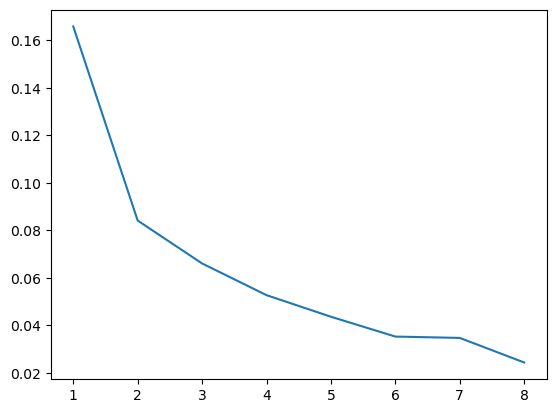

In [22]:
plt.plot([1,2,3,4,5,6,7,8], [d1,d2,d3,d4,d5,d6,d7,d8])

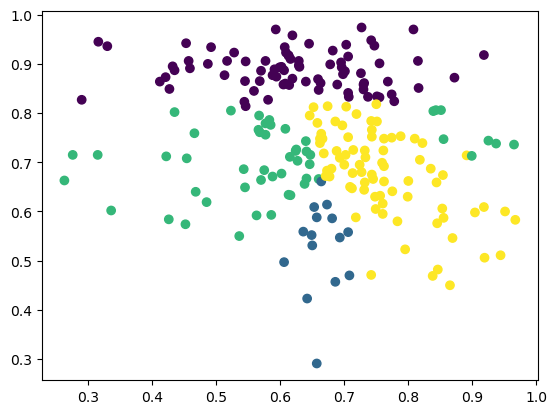

In [23]:
clust_assign = np.argmax(pmi4, axis=1)
plt.scatter(dat['danceability'], dat['energy'], c=clust_assign)